# Getting to Know Audio Frequencies, Part 1: Visualizing Sounds of Tuning Forks

**If you have access to one or more tuning forks, be sure to make digital recordings of those forks first by using the notebook `0-tuning-forks-record.ipynb`.**

**Objectives:** 
* Plot recorded signals from different tuning forks and study them at different time scales.
* Compare the recorded signals from tuning forks that are tuned to different tunes.

**Required Materials**
* Computer speakers
* Python audio libraries noted below


## Loading the Necessary Libraries

Run each of the cells below, until you get to the  block titled **Recording the Tuning Fork(s)**. In  most cases, you can run a cell and advance to the next cell by clicking on the cell and pressing shift-Enter on the keyboard. The triangular "play" button in the widgets bar at the top of the notebook can also be used to run a selected cell.

In [3]:
# These are the minimum sound libraries required. 

import scipy.io.wavfile as wavfile
import sounddevice as sd

In [4]:
# Library for visualizing the sound recordings

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Helper libraries

import numpy as np
import time


In [6]:
# The code in this block loads some elements for adding interactive 
# widgets to the code

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import IPython.display as display



## Selecting Audio Data

If you recorded your own tuning forks, uncomment the appropriate lines in the cell below:



In [7]:
OwnRecordings=[]

# If you recorded your own tuning forks, uncomment ONE
# of the lines below. If you did not record, then do
# not change anything in this block.


#OwnRecordings=['A', 'E']  # If you recorded an A and an E fork
#OwnRecordings=['A']       # If you only recorded an A fork
#OwnRecordings=['E']       # If you only recorded an E fork

The following block will load the data for the different tuning forks. If you recorded your own forks, then that data will be loaded. Otherwise the following data will be used:

* `beethovenA.jpg` is from a recording of Ludwig von Beethoven's tuning fork. You can download the full recording from [Soundcloud](https://soundcloud.com/the-british-library/beethovens-tuning-fork). Some information about Beethoven's tuning fork can be found at the [British Library](https://blogs.bl.uk/music/2017/03/beethovens-tuning-fork.html). Note that Beethoven's tuning fork plays a slightly different tone than today's standard A tuning forks, and we will demonstrate how to find out how to characterize that tone.
* `forkE-UF.wav` is a recording of a D'Addario E 329.6 Hz tuning fork made by the University of Florida team.

In [8]:
if 'A' not in OwnRecordings:
    rateA, dataA = wavfile.read('beethoven-forkA.wav')
    dataA=dataA[:,0]
if 'E' not in OwnRecordings:
    rateE, dataE = wavfile.read('forkE-UF.wav')

## Visualizing the Data (Time Domain)

We can plot the sampled data to look at what the sound pressure at the microphone looks like. 

### A Tuning Fork

Let's start by plotting the whole sample for the A tuning fork:

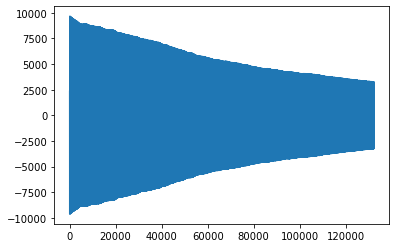

In [9]:
plt.plot(dataA);

Because there are over 130,000 samples plotted into that small space, it is hard to understand what the signal looks like. We can tell that the intensity is decreasing with time, which we can also hear with our ears -- the tuning fork's sound gets quieter over time.

To better understand what the signal looks like, use the widgets below to look at what the signal looks like at different times and zooms (setting a duration < 3s means that we are zooming in to look at a smaller part of the signal):

In [10]:

times = np.linspace(0, 3, len(dataA) )
def time_zoom( duration=0.18, start_time=0):
    start_samples=int(start_time*len(dataA)/3)
    duration_samples=int(duration/3*len(dataA))
    end_samples=start_samples+duration_samples
    plt.plot(times[start_samples: end_samples], dataA[start_samples: end_samples] )
    plt.xlabel('Time (s)')
    plt.ylabel('Relative sound pressure')
    plt.show();
    return()
interact(time_zoom, duration=(0.01,1.5,0.01), start_time=(0, 1.5, 0.05));




interactive(children=(FloatSlider(value=0.18, description='duration', max=1.5, min=0.01, step=0.01), FloatSlid…

Here is the signal in the first 0.01s:

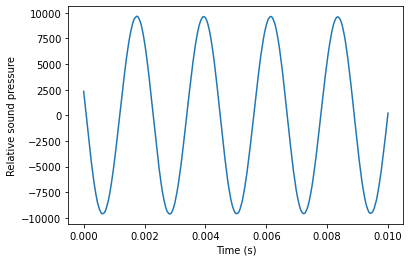

In [11]:
times = np.linspace(0, 0.01, 441)
plt.plot(times, dataA[:441])
plt.xlabel('Time (s)')
plt.ylabel('Relative sound pressure');

The resulting signal follows a very distinctive pattern -- 

**Question 1.1: Does anyone know what this type of signal or function is called?**

### E Tuning Fork 

Let's see what the signal for the E tuning fork  looks like:

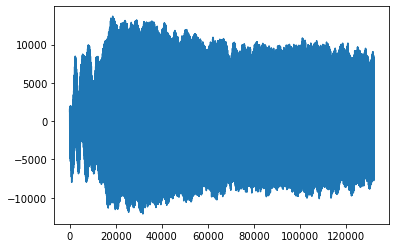

In [15]:
plt.plot(dataE);

As before, use the sliders to look at the signal with different zooms and at different times:

In [17]:

times = np.linspace(0, 3, len(dataA) )
def time_zoom( duration=0.18, start_time=0):
    start_samples=int(start_time*len(dataE)/3)
    duration_samples=int(duration/3*len(dataE))
    end_samples=start_samples+duration_samples
    plt.plot(times[start_samples: end_samples], dataE[start_samples: end_samples] )
    plt.xlabel('Time (s)')
    plt.ylabel('Relative sound pressure')
    plt.show();
    return()
interact(time_zoom, duration=(0.01,1.5,0.01), start_time=(0, 1.5, 0.05));




interactive(children=(FloatSlider(value=0.18, description='duration', max=1.5, min=0.01, step=0.01), FloatSlid…

Here is the data for the E tuning fork in the first 0.01s:

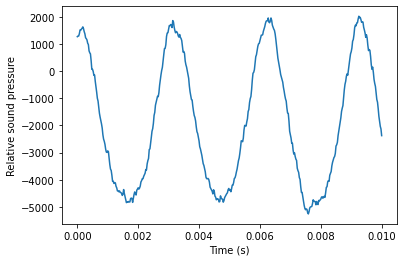

In [18]:
times = np.linspace(0, 0.01, 441)
plt.plot(times, dataE[:441])
plt.xlabel('Time (s)')
plt.ylabel('Relative sound pressure');

We again see a repeating wave, but if you are using the UF data, you will notice that the repeating wave has more variations than before. The reason for this is that the recording is not as careful as the one of Beethoven's tuning fork. Small, fast amplitude fluctuations are caused the low level of the tuning fork sound compared to noise in the environment, and large changes in amplitude are caused by variations in the distance between the tuning fork and the microphone.

## Comparing Audio Signals for Tuning Forks with Different Tunings

Now let's compare the audio signals for Beethoven's tuning fork and the UF "E" tuning fork. Let's first play them back-to-back, so that you can hear the difference in the tones. When you run the cell below, you will first hear Beethoven's tuning fork and then the UF "E" tuning fork:




In [19]:
print("Beethoven:")
sd.play(dataA, rateA)
time.sleep(3)
print()
print("UF E:")
sd.play(dataE, rateE)




Beethoven:

UF E:


Let's see if we can see what feature of these signals is responsible for the difference in tones by 
plotting the two signals on the same plot. 

Text(0, 0.5, 'Relative sound pressure')

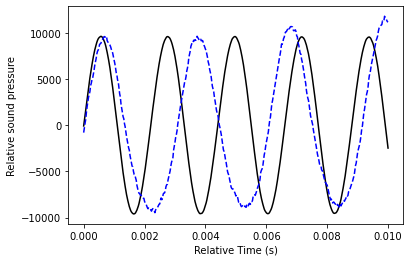

In [20]:
times = np.linspace(0, 0.01, 441)
startA=52
startE=5080
plt.plot(times, dataA[startA:startA+441], 'k')
plt.plot(times, 1.9*dataE[startE:startE+441]-4500, 'b--')
plt.xlabel('Relative Time (s)')
plt.ylabel('Relative sound pressure')

**QUESTION 1.3: What is different between the plots shown of the "Beethoven A" and "UF E" waves?**

Note that each of these tones is composed of a repeating pattern. If we select a portion of the signal that can be repeated back-to-back to create the whole signal, then that portion is called one *cycle* of the signal. Here is one cycle from Beethoven's tuning fork:

Text(0, 0.5, 'Relative sound pressure')

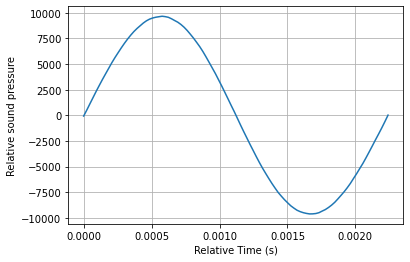

In [21]:
length=0.00224
times = np.linspace(0, length, int(44100*length))
startA=52
plt.plot(times, dataA[startA:startA+int(44100*length)])
plt.grid()
plt.xlabel('Relative Time (s)')
plt.ylabel('Relative sound pressure')

And here is one cycle from the UF E tuning fork:

Text(0, 0.5, 'Relative sound pressure')

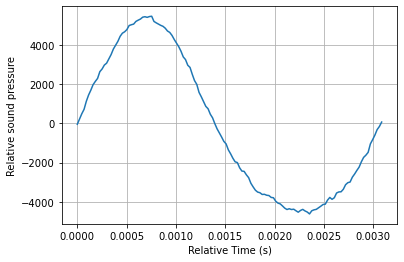

In [22]:
length=0.003085
times = np.linspace(0, length, int(44100*length))
startE=5080
plt.plot(times, dataE[startE:startE+int(44100*length)]-2000)
plt.grid()
plt.xlabel('Relative Time (s)')
plt.ylabel('Relative sound pressure')

**Question 1.4: Ignoring the small fluctuations in the recording, what do you notice that is different about the two plots of individual cycles of the "Beethoven A" and "UF E" waves?**

## Making Waves

**Question 1.5: Circle the appropriate relation in each sentence:**

* Beethoven's tuning fork sounded higher/lower than the UF E tuning fork.

* For a fixed observation time of 0.01 s, we observed that Beethoven's tuning had more/less cycles than the UF E tuning fork.

* One cycle of the Beethoven's tuning fork took more/less time than one cycle of the UF E tuning fork.

Based on these observations, we may guess that different sinusoids (in terms of the length of one cycle  or the number of cycles in some observation time) result in different sounding tones (higher or lower).

The following code generates sinusoids, where the number of cycles per second is specified using a slider. Adjust the slider to different values and determine the effect on the pitch of the audio signal: 

In [152]:
duration = 1
rate = 44100
times = np.linspace(0, 1, rate*duration )
def play_tone( cycle_rate=1000):
    duration_samples=int(cycle_rate*duration)
    signal=np.sin(2*np.pi*cycle_rate*times)
    plt.plot(times[:441], signal[:441])
    plt.xlabel('Time (s)')
    plt.ylabel('Relative sound pressure')
    plt.show();
    sd.play(signal, rate)
    return()
interact(play_tone, cycle_rate=(100, 4000, 100));




interactive(children=(IntSlider(value=1000, description='cycle_rate', max=4000, min=100, step=100), Output()),…

**Question 1.6: How does the `cycle_rate` parameter effect the pitch of the audio signal?**